#### Import python files from another directory
In order to reuse code written in .py files you need to import them.
If they are from a distant folder, rather than copy-paste it into the current folder, you can write:

In [2]:
import sys

sys.path.append(
    "../../ex02/template"
)  # This goes up twice in the directories tree (hence in labs)
# then goes down to ex02/template where your files from lab 2 are.

you can now import your desired files, for example, we can import grid_search.py with:

In [3]:
import grid_search  # You then need to call your functions using grid_search.function_name()
import grid_search as gs  # You then need to call your functions using gs.function_name()
from grid_search import *  # You can call any functions of the file with function_name()

# Let's try to call generate_w from grid_search.py:
w0, w1 = generate_w(5)
print(w0, w1)

[-100.  -25.   50.  125.  200.] [-150.  -75.    0.   75.  150.]


As you can see we are now able to call functions from the grid_search.py file.

In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

from test_utils import test

%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [5]:
def least_squares(y, tx):
    """Calculate the least squares solution.
       returns mse, and optimal weights.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        mse: scalar.

    >>> least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
    """
    w, _, dim, ar = np.linalg.lstsq(tx, y, rcond= None)
    mse = np.sum((y - tx @ w)**2)
    
    return w, mse

least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    

(array([ 0.21212121, -0.12121212]), 1.9259299443872359e-32)

### You can test your implementation here

In [6]:
test(least_squares)
# NB:
#
# Due to precision issues,
# the output might not be exactly the same
# even if you have implemented the right code.
#
# For example, the mse output expected to be
# 8.666684749742561e-33,
# but you might get some other small number
# close to zero.
#
# In this case,
# Failing the test doesn't necessarily means
# your implementation is wrong.:)

❌ The are some issues with your implementation of `least_squares`:
**********************************************************************
File "__main__", line 13, in least_squares
Failed example:
    least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
Expected:
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
Got:
    (array([ 0.21212121, -0.12121212]), 1.9259299443872359e-32)
**********************************************************************


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [7]:
def test_your_least_squares():
    """
    # this code should compare the optimal weights obtained
    # by least squares vs. grid search
    """
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    
    losses, w0, w1 = run_grid_search(y, tx)
    weights, loss = least_squares(y, tx)
    
    print('grid search', [w0, w1])
    print('least sqaure', weights)


Test it here

In [8]:
test_your_least_squares()

grid search [72.72727272727272, 13.636363636363626]
least sqaure [73.293922   13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [9]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [10]:
x ** 0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.

    Returns:
        poly: numpy array of shape (N,d+1)

    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """
    
    x = x[:, None]
    res = x ** 0
    
    
    for i in range(1, degree +1): 
        res = np.concatenate((res, x ** i), axis = 1)
    
    return res
    
build_poly(np.array([0.0, 1.5]), 3)

array([[1.   , 0.   , 0.   , 0.   ],
       [1.   , 1.5  , 2.25 , 3.375]])

In [12]:
test(build_poly)

✅ Your `build_poly` passed 1 tests.


Once your implementation of `build_poly` passes the test, copy it to `build_polynomial.py`
Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [13]:
data = build_poly(x, 1)
# ***************************************************
# INSERT YOUR CODE HERE
# least square and calculate RMSE: TODO
# ***************************************************
weights, mse = least_squares(data, y[:, None])

mse

570.9821184382716

In [14]:
from plots import *


def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
    and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]

    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        data = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        weights, mse = least_squares(y, data)
        
        rmse = np.sqrt(2*mse)
        
        print('mse', mse)

        print(
            "Processing {i}th experiment, degree={d}, rmse={loss}".format(
                i=ind + 1, d=degree, loss=rmse
            )
        )
        # plot fit
        plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()

    plt.show()

Run polynomial regression

mse 11.133351726547978
Processing 1th experiment, degree=1, rmse=4.718760796342187
mse 3.3432526197090584
Processing 2th experiment, degree=3, rmse=2.5858277667737495
mse 3.1164734143881834
Processing 3th experiment, degree=7, rmse=2.496587036090744
mse 2.8878070758755623
Processing 4th experiment, degree=12, rmse=2.4032507467493116


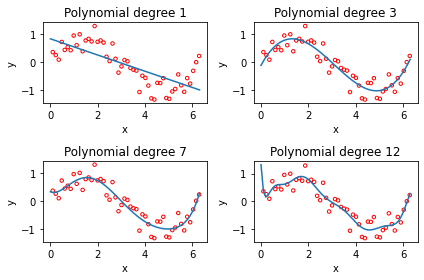

In [15]:
polynomial_regression()

Your results should look like this:

![alt text](visualize_polynomial_regression.png)

# 2 Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [16]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

unison_shuffled_copies(x, y)

(array([2.24518674, 3.12849893, 3.25468638, 1.2356871 , 4.51656093,
        0.98331219, 0.73093728, 6.15699785, 2.74993656, 4.01181111,
        5.90462294, 3.00231147, 4.8951233 , 3.50706129, 5.27368567,
        2.11899928, 4.13799857, 0.47856237, 6.28318531, 0.1       ,
        1.61424946, 3.7594362 , 4.76893584, 4.64274839, 2.87612401,
        6.0308104 , 0.22618746, 3.88562366, 5.14749821, 5.02131076,
        5.77843549, 1.10949964, 1.36187455, 5.65224803, 0.35237491,
        2.49756165, 2.37137419, 1.99281183, 5.52606058, 0.85712473,
        1.48806201, 4.26418602, 0.60474982, 4.39037348, 3.63324875,
        5.39987312, 2.6237491 , 3.38087384, 1.74043692, 1.86662437]),
 array([ 7.00138842e-01,  7.69121860e-02,  3.05224230e-02,  9.94909022e-01,
        -7.37222919e-01,  9.51211821e-01,  5.38669461e-01, -1.41108000e-04,
         1.21879684e-01, -5.59911457e-01, -7.66467434e-01, -1.50508406e-01,
        -1.28027608e+00, -2.68157012e-01, -9.56348655e-01,  7.77071848e-01,
        -8.351

In [17]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8
    you will have 80% of your data set dedicated to training
    and the rest dedicated to testing. If ratio times the number of samples is not round
    you can use np.floor. Also check the documentation for np.random.permutation,
    it could be useful.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        y: numpy array of shape (N,).
        ratio: scalar in [0,1]
        seed: integer.

    Returns:
        x_tr: numpy array containing the train data.
        x_te: numpy array containing the test data.
        y_tr: numpy array containing the train labels.
        y_te: numpy array containing the test labels.

    >>> split_data(np.arange(13), np.arange(13), 0.8, 1)
    (array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]), array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]))
    """
    # set seed
    np.random.seed(seed)
    
    x_shuffle, y_shuffle = unison_shuffled_copies(x, y)
    split_pos = round(len(x_shuffle)*ratio)
    
    return x_shuffle[: split_pos], x_shuffle[split_pos:], y_shuffle[:split_pos], y_shuffle[split_pos:],

split_data(np.arange(13), np.arange(13), 0.8, 1)

(array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]),
 array([ 8, 11,  5]),
 array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]),
 array([ 8, 11,  5]))

In [18]:
test(split_data)

✅ Your `split_data` passed 1 tests.


Then, test your `split_data` function below.

In [19]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees.

    Returns:
      x_tr: numpy array
      x_te: numpy array
      y_tr: numpy array
      y_te: numpy array
      weights: weights from the least squares optimization"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x, test_x, train_y, test_y = split_data(x, y, ratio, seed= seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_x_poly = build_poly(train_x, degree)
    test_x_poly = build_poly(test_x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    weights, mse = least_squares(train_y, train_x_poly)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*mse)
    
    #print(np.sum((test_y - test_x_poly @ weights)**2))
    rmse_te = np.sqrt(2* np.sum((test_y - test_x_poly @ weights)**2))
    
    print(
        "proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
            p=ratio, d=degree, tr=rmse_tr, te=rmse_te
        )
    )
    
    #print(train_x_poly.shape, test_x_poly.shape, train_y.shape, test_y.shape, weights)
    return train_x, test_x, train_y, test_y, weights
    
#train_test_split_demo(x, y, 2, 0.8, 33)

Demo time

proportion=0.9, degree=1, Training RMSE=4.685, Testing RMSE=0.573
(45,) (45,)
proportion=0.9, degree=3, Training RMSE=2.507, Testing RMSE=0.653
(45,) (45,)
proportion=0.9, degree=7, Training RMSE=2.408, Testing RMSE=0.695
(45,) (45,)
proportion=0.9, degree=12, Training RMSE=2.294, Testing RMSE=0.790
(45,) (45,)
proportion=0.7, degree=1, Training RMSE=4.318, Testing RMSE=1.926
(35,) (35,)
proportion=0.7, degree=3, Training RMSE=2.084, Testing RMSE=1.690
(35,) (35,)
proportion=0.7, degree=7, Training RMSE=1.903, Testing RMSE=1.825
(35,) (35,)
proportion=0.7, degree=12, Training RMSE=1.862, Testing RMSE=1.778
(35,) (35,)
proportion=0.5, degree=1, Training RMSE=3.215, Testing RMSE=3.753
(25,) (25,)
proportion=0.5, degree=3, Training RMSE=1.688, Testing RMSE=2.096
(25,) (25,)
proportion=0.5, degree=7, Training RMSE=1.643, Testing RMSE=2.009
(25,) (25,)
proportion=0.5, degree=12, Training RMSE=1.448, Testing RMSE=7.528
(25,) (25,)
proportion=0.1, degree=1, Training RMSE=1.352, Testing RMSE=5

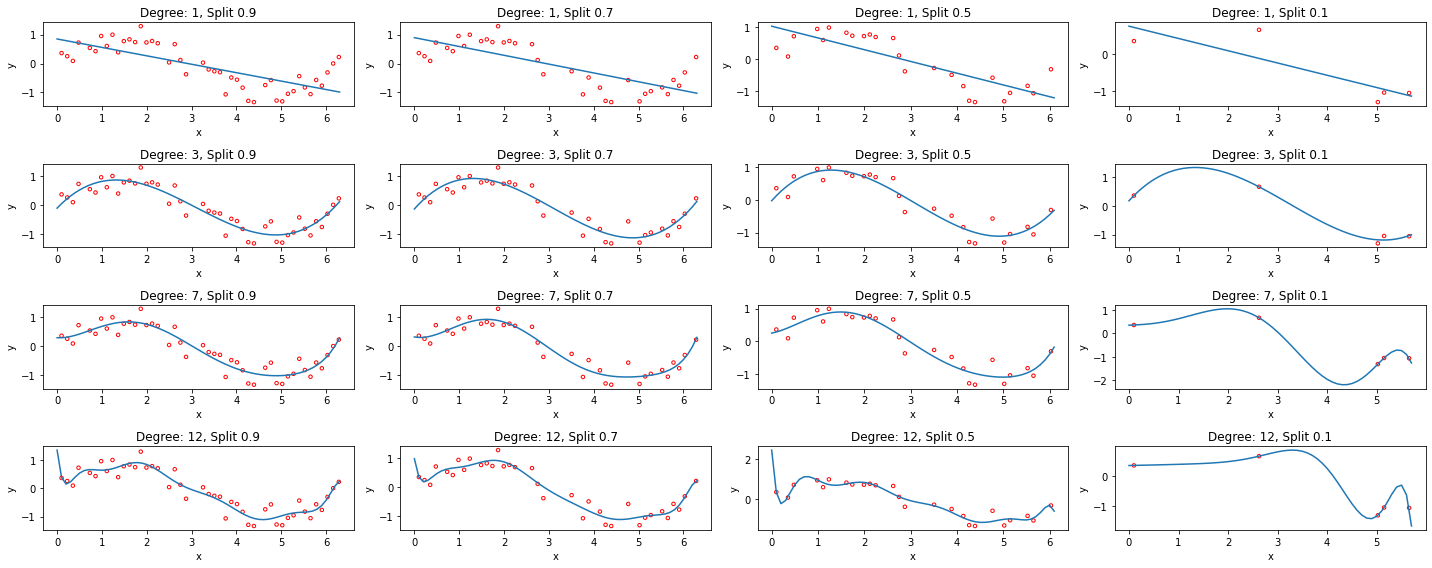

In [20]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.7, 0.5, 0.1]

# define the structure of the figure
num_row = 4
num_col = 4
axs = plt.subplots(num_row, num_col, figsize=(20, 8))[1]

for ind, split_ratio in enumerate(split_ratios):
    for ind_d, degree in enumerate(degrees):
        x_tr, x_te, y_tr, y_te, w = train_test_split_demo(
            x, y, degree, split_ratio, seed
        )
        print(y_tr.shape, x_tr.shape)
        plot_fitted_curve(y_tr, x_tr, w, degree, axs[ind_d][ind % num_col])
        axs[ind_d][ind].set_title(f"Degree: {degree}, Split {split_ratio}")
plt.tight_layout()

Your graph should look like this:

![alt text](split_demo.png)

# Ridge Regression
Please fill in the function below.

In [21]:
np.identity(10) * 3

array([[3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [26]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
        lambda_: scalar.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.

    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 0)
    array([ 0.21212121, -0.12121212])
    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 1)
    array([0.03947092, 0.00319628])
    """
    
    N = len(tx.T @ tx)
    # print(tx.T.shape,  y.shape)
    w = np.linalg.solve(tx.T @ tx  + np.identity(N) * (lambda_*(2*N)),  tx.T @ y)
    #loss = 1/len(tx) * np.sum((y - tx @ w)** 2)
    return w

ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 0)

array([ 0.21212121, -0.12121212])

In [27]:
test(ridge_regression)

✅ Your `ridge_regression` passed 2 tests.


In [24]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    train_x, train_y, test_x, test_y, = split_data(x, y, ratio, seed= seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_x_poly = build_poly(train_x, degree)
    test_x_poly = build_poly(test_x, degree)
    
    

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w = ridge_regression(train_y, train_x_poly, lambda_)
        rmse_tr.append(((1/len(train_x_poly) * np.sum((train_y - train_x_poly @ w)** 2))))
        rmse_te.append(((1/len(test_x_poly) * np.sum((test_y - test_x_poly @ w)** 2)) ))
        print(
            "proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
                p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]
            )
        )
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

Demo time

(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.691, Testing RMSE=970.128
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.692, Testing RMSE=479.865
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.694, Testing RMSE=276.228
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.697, Testing RMSE=188.500
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=1.706, Testing RMSE=135.220
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.001, Training RMSE=1.734, Testing RMSE=88.625
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.001, Training RMSE=1.792, Testing RMSE=49.003
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.003, Training RMSE=1.869, Testing RMSE=24.104
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.007, Training RMSE=1.939, Testing RMSE=12.249
(8, 25) (25,)
proportion=0.5, degree=7, lambda=0.016, Training RMSE=1.991, Testing RMSE=6.725
(8, 25) (25,)
proportion=0.5, degree=7, lambda

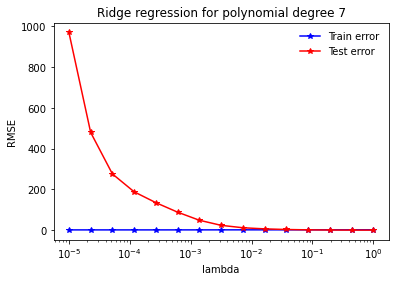

In [25]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

Your plot should look like:

![alt text](ridge_regression.png)